In [4]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the wine dataset
wine_data = pd.read_csv('/content/Wine.csv')

In [5]:
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
wine_data.shape

(178, 14)

In [10]:
wine_data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [22]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [12]:

# Separate features and target
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
           'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
           'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

X = wine_data[features]  # Features
y = wine_data['Customer_Segment']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [24]:
wine_data.isnull().sum()


,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [13]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [14]:
# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [15]:
# Print the explained variance ratio for each component
print("Explained variance ratio by component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f}")


Explained variance ratio by component:
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193
PC11: 0.0174
PC12: 0.0130
PC13: 0.0080


In [16]:
# Print cumulative explained variance
print("\nCumulative explained variance:")
for i, var in enumerate(cumulative_variance):
    print(f"First {i+1} components: {var:.4f}")


Cumulative explained variance:
First 1 components: 0.3620
First 2 components: 0.5541
First 3 components: 0.6653
First 4 components: 0.7360
First 5 components: 0.8016
First 6 components: 0.8510
First 7 components: 0.8934
First 8 components: 0.9202
First 9 components: 0.9424
First 10 components: 0.9617
First 11 components: 0.9791
First 12 components: 0.9920
First 13 components: 1.0000


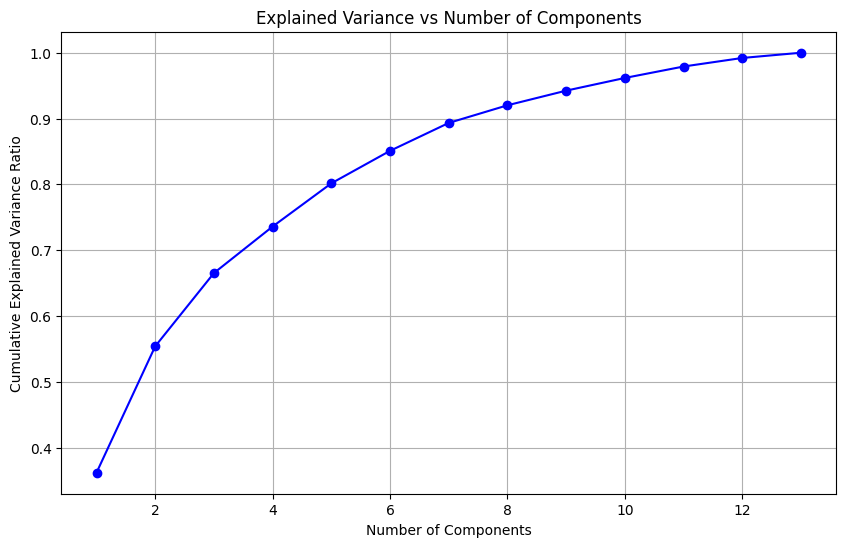

In [17]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

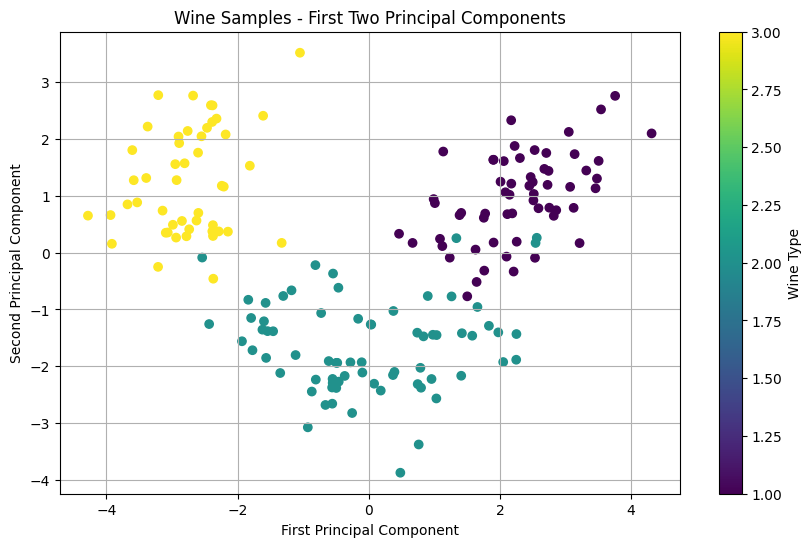

In [18]:

# Plot first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Wine Samples - First Two Principal Components')
plt.colorbar(label='Wine Type')
plt.grid(True)
plt.show()

In [19]:
# Create a new dataframe with the first 3 principal components
pca_df = pd.DataFrame(
    data=X_pca[:, :3],
    columns=['PC1', 'PC2', 'PC3']
)
pca_df['Wine_Type'] = y

In [20]:
# Show the first few rows of the transformed data
print("\nFirst few rows of transformed data (first 3 principal components):")
print(pca_df.head())


First few rows of transformed data (first 3 principal components):
        PC1       PC2       PC3  Wine_Type
0  3.316751  1.443463 -0.165739          1
1  2.209465 -0.333393 -2.026457          1
2  2.516740  1.031151  0.982819          1
3  3.757066  2.756372 -0.176192          1
4  1.008908  0.869831  2.026688          1


In [21]:
pca_df.tail()

,PC1,PC2,PC3,Wine_Type
173,-3.370524,2.216289,-0.342570,3
174,-2.601956,1.757229,0.207581,3
175,-2.677839,2.760899,-0.940942,3
176,-2.387017,2.297347,-0.550696,3
177,-3.208758,2.768920,1.013914,3


In [28]:
pca_df['Wine_Type'].unique()

array([1, 2, 3])